In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Dataset/Random_Dataset.csv")

In [3]:
df.sample(5)

,Category,Price,Rating,Stock,Discount
2713,NaN,NaN,1.078890,Out of Stock,21.0
3757,D,6481.0,3.807816,Out of Stock,43.0
2301,NaN,5671.0,NaN,Out of Stock,35.0
2365,B,6906.0,NaN,Out of Stock,41.0
1978,NaN,2753.0,4.976548,NaN,46.0


In [4]:
df.isnull().mean()*100

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64

In [5]:
X = df.drop(columns=['Discount'])
y = df['Discount']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)

In [7]:
X_train['Price_imputed'] = X_train['Price']
X_test['Price_imputed'] = X_test['Price']

X_train['Rating_imputed'] = X_train['Rating']
X_test['Rating_imputed'] = X_test['Rating']

In [8]:
X_train.head()

,Category,Price,Rating,Stock,Price_imputed,Rating_imputed
2063,NaN,8486.0,NaN,In Stock,8486.0,NaN
3398,A,6696.0,4.013772,NaN,6696.0,4.013772
261,NaN,1959.0,4.962775,Out of Stock,1959.0,4.962775
710,NaN,193.0,NaN,In Stock,193.0,NaN
2997,NaN,1192.0,4.538780,In Stock,1192.0,4.538780


In [9]:
X_train['Rating_imputed'][X_train['Rating_imputed'].isnull()]

2063   NaN
710    NaN
3754   NaN
4008   NaN
2400   NaN
        ..
3259   NaN
128    NaN
2737   NaN
1872   NaN
2841   NaN
Name: Rating_imputed, Length: 389, dtype: float64

In [10]:
X_train['Rating_imputed'][X_train['Rating_imputed'].isnull()] = X_train['Rating'].dropna().sample(X_train['Rating'].isnull().sum()).values
X_test['Rating_imputed'][X_test['Rating_imputed'].isnull()] = X_test['Rating'].dropna().sample(X_test['Rating'].isnull().sum()).values

C:\Users\anshu\AppData\Local\Temp\ipykernel_41788\3928454161.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Rating_imputed'][X_train['Rating_imputed'].isnull()] = X_train['Rating'].dropna().sample(X_train['Rating'].isnull().sum

In [11]:
X_train

,Category,Price,Rating,Stock,Price_imputed,Rating_imputed
2063,NaN,8486.0,NaN,In Stock,8486.0,2.788718
3398,A,6696.0,4.013772,NaN,6696.0,4.013772
261,NaN,1959.0,4.962775,Out of Stock,1959.0,4.962775
710,NaN,193.0,NaN,In Stock,193.0,3.881903
2997,NaN,1192.0,4.538780,In Stock,1192.0,4.538780
...,...,...,...,...,...,...
2155,NaN,8977.0,4.548855,NaN,8977.0,4.548855
1318,D,6690.0,1.589541,NaN,6690.0,1.589541
1849,B,9699.0,1.997081,In Stock,9699.0,1.997081
2841,NaN,131.0,NaN,In Stock,131.0,1.038637


In [12]:
X_train['Rating_imputed'].isnull().sum()
X_train['Price_imputed'].isnull().sum()

36

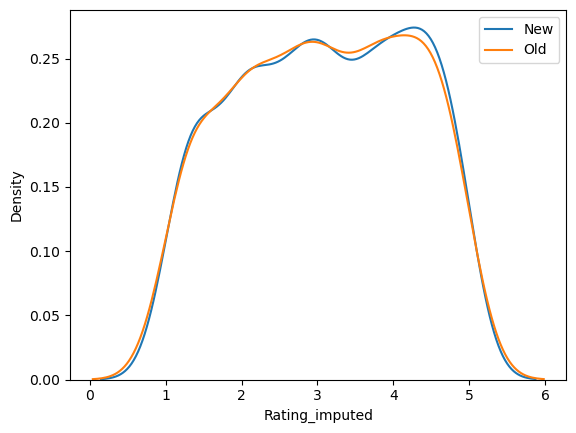

In [13]:
sns.kdeplot(X_train['Rating_imputed'], label = "New")
sns.kdeplot(X_train['Rating'], label = "Old")
plt.legend()
plt.show()

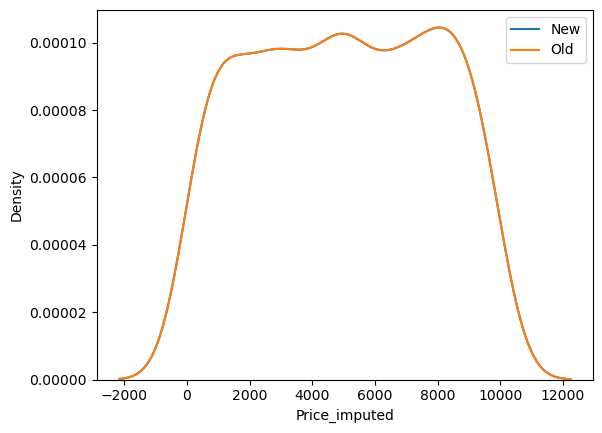

In [14]:
sns.kdeplot(X_train['Price_imputed'], label = "New")
sns.kdeplot(X_train['Price'], label = "Old")
plt.legend()
plt.show()

In [15]:
print("The Original variable varience is: ", X_train['Price'].var())
print("The Original variable varience is: ", X_train['Price_imputed'].var())

print("The Original variable varience is: ", X_train['Rating'].var())
print("The Original variable varience is: ", X_train['Rating_imputed'].var())

The Original variable varience is:  8330572.544956022
The Original variable varience is:  8330572.544956022
The Original variable varience is:  1.2931790092176432
The Original variable varience is:  1.301507642588494


In [16]:
X_train[['Price','Price_imputed','Rating','Rating_imputed']].cov()

,Price,Price_imputed,Rating,Rating_imputed
Price,8.330573e+06,8.330573e+06,16.437380,-30.449491
Price_imputed,8.330573e+06,8.330573e+06,16.437380,-30.449491
Rating,1.643738e+01,1.643738e+01,1.293179,1.293179
Rating_imputed,-3.044949e+01,-3.044949e+01,1.293179,1.301508


<Axes: >

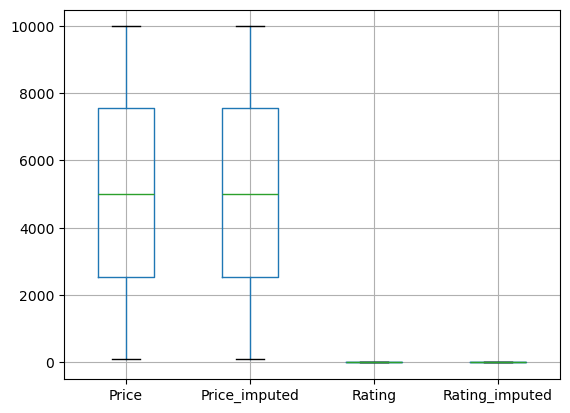

In [17]:
X_train[['Price','Price_imputed','Rating','Rating_imputed']].boxplot()

In [18]:
df.sample(5)

,Category,Price,Rating,Stock,Discount
1660,NaN,628.0,3.298096,In Stock,28.0
2989,NaN,3947.0,3.268255,In Stock,31.0
701,NaN,3947.0,NaN,In Stock,39.0
943,D,7621.0,NaN,Out of Stock,30.0
724,NaN,2809.0,3.898358,Out of Stock,28.0


In [19]:
df.isnull().mean()*100

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64

In [20]:
X = df.drop(columns=['Discount'])
y = df['Discount']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)

In [22]:
X_train['Category_imputed'] = X_train['Category']
X_test['Category_imputed'] = X_test['Category']

X_train['Stock_imputed'] = X_train['Stock']
X_test['Stock_imputed'] = X_test['Stock']

In [23]:
X_train

,Category,Price,Rating,Stock,Category_imputed,Stock_imputed
3095,A,5374.0,NaN,NaN,A,NaN
531,NaN,7446.0,NaN,In Stock,NaN,In Stock
1510,B,4242.0,1.240913,Out of Stock,B,Out of Stock
4019,D,9091.0,3.296486,Out of Stock,D,Out of Stock
751,C,NaN,4.073897,Out of Stock,C,Out of Stock
...,...,...,...,...,...,...
1665,NaN,3734.0,3.580741,Out of Stock,NaN,Out of Stock
2326,NaN,2294.0,NaN,In Stock,NaN,In Stock
1142,NaN,4097.0,NaN,Out of Stock,NaN,Out of Stock
809,B,2557.0,NaN,In Stock,B,In Stock


In [24]:
X_train['Category_imputed'][X_train['Category_imputed'].isnull()] = X_train['Category'].dropna().sample(X_train['Category'].isnull().sum(), replace=True).values
X_test['Category_imputed'][X_test['Category_imputed'].isnull()] = X_test['Category'].dropna().sample(X_test['Category'].isnull().sum(), replace=True).values

X_train['Stock_imputed'][X_train['Stock_imputed'].isnull()] = X_train['Stock'].dropna().sample(X_train['Stock'].isnull().sum(), replace=True).values
X_test['Stock_imputed'][X_test['Stock_imputed'].isnull()] = X_test['Stock'].dropna().sample(X_test['Stock'].isnull().sum(), replace=True).values

C:\Users\anshu\AppData\Local\Temp\ipykernel_41788\3772591749.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Category_imputed'][X_train['Category_imputed'].isnull()] = X_train['Category'].dropna().sample(X_train['Category'].isnu

In [25]:
X_train['Category_imputed'].isnull().sum()

0

In [26]:
X_train['Stock_imputed'].isnull().sum()

0

In [209]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.linear_model import LogisticRegression

In [211]:
df = pd.read_csv('./Dataset/Random_Dataset_cleaned.csv')

In [213]:
df.sample(5)

,Category,Price,Rating,Stock,Discount
508,NaN,NaN,1.802829,Out of Stock,19.0
3659,NaN,4155.0,NaN,NaN,28.0
4070,NaN,2831.0,4.179235,Out of Stock,26.0
2049,NaN,2579.0,NaN,Out of Stock,34.0
3766,A,234.0,3.957213,In Stock,24.0


In [215]:
X = df.drop(columns = ['Category', 'Stock', 'Discount'])

In [217]:
y = df['Discount']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 2)

In [221]:
X_train.head()

,Price,Rating
2722,4751.0,2.182610
1616,1317.0,NaN
345,6336.0,3.648350
3677,9574.0,NaN
1274,1735.0,3.508711


In [223]:
si = SimpleImputer()
X_train_transformed = si.fit_transform(X_train)
X_test_transformed = si.transform(X_test)

In [253]:
X_train_transformed

array([[4.75100000e+03, 2.18261029e+00],
       [1.31700000e+03, 3.04791678e+00],
       [6.33600000e+03, 3.64834951e+00],
       ...,
       [3.22500000e+03, 3.04791678e+00],
       [5.08807692e+03, 3.04791678e+00],
       [2.40800000e+03, 3.04791678e+00]])

In [255]:
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train_transformed, y_train)
y_pred = reg.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1011461318051576

In [256]:
# df = df.drop(columns = ['Category', 'Rating','Stock', 'Discount'])

In [257]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [258]:
X_train_new = mi.transform(X_train)
X_train_new

array([], shape=(872, 0), dtype=bool)

In [259]:
X_test_new = mi.transform(X_test)
X_test_new

array([], shape=(3490, 0), dtype=bool)

In [232]:
# X_train['Price_NA'] = X_train_new
# X_train['Price_NA'] = X_test_new

In [233]:
# You need to put 1D array here, but we are getting 2D array. We can change it via X_train
# You can then create new missing indicatior via LogisticRegression only, and see the new thing!

In [234]:
# Trying Missing Indicator using simple Imputer

In [265]:
si = SimpleImputer(add_indicator = True)
reg = LogisticRegression()
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'